In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('datasetCHURN.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
307,4115-BNPJY,Male,0,Yes,Yes,29,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,75.55,2054.4,No
1061,4829-ZLJTK,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,112.40,8046.85,No
1640,2351-RRBUE,Female,0,Yes,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,134.05,No
3124,3889-VWBID,Male,0,Yes,Yes,68,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),82.85,5776.45,No
4682,0504-HHAPI,Female,1,No,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),88.30,2467.75,Yes
3986,6242-FEGFD,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,96.60,6424.25,No
5276,2725-IWWBA,Male,0,Yes,Yes,46,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Mailed check,56.90,2560.1,No
989,3280-NMUVX,Male,0,Yes,Yes,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.60,678.8,No
4183,6917-IAYHD,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,33.60,33.6,No
1444,5514-YQENT,Male,0,No,Yes,41,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.15,4507.15,No


### Data Exploration

 In machine learning, customerID is not needed. So I will drop that column...


In [5]:
df.drop('customerID', axis='columns', inplace=True) # This is drops customerID and updates the dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As shown above the column 'customerID' has been dropped. All column datatypes are shown here.

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df.iloc[488].TotalCharges

' '

In [13]:
df[df.TotalCharges!=' '].shape

(7032, 20)

###  Removing Rows with Space in TotalCharges Columns

In [14]:
data = df[df.TotalCharges!=' ']

In [15]:
data.shape

(7032, 20)

In [16]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)

C:\Users\piana\AppData\Local\Temp\ipykernel_22244\939399089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalCharges = pd.to_numeric(data.TotalCharges)


In [18]:
data.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
data[data.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## Data Visualizations

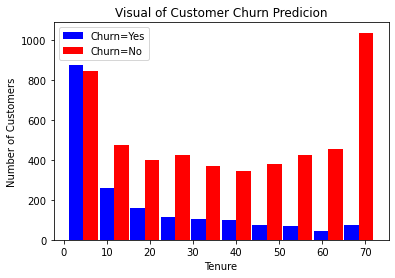

In [20]:
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Visual of Customer Churn Predicion")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

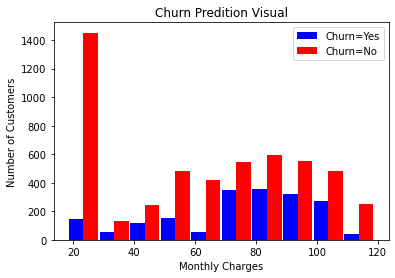

In [21]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Churn Predition Visual')

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

###### Some of the columns are Yes, No, etc. Let's print unique values in object colums see data values

In [22]:
def printUniqueColumnValue(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [23]:
printUniqueColumnValue(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### some of the comuns have no internet service or no phone service, that can be replaced with a simple No

In [24]:
data.replace('No internet service', 'No',  inplace=True)
data.replace('No phone service', 'No',  inplace=True)

C:\Users\piana\AppData\Local\Temp\ipykernel_22244\1312253386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('No internet service', 'No',  inplace=True)
C:\Users\piana\AppData\Local\Temp\ipykernel_22244\1312253386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('No phone service', 'No',  inplace=True)


In [25]:
printUniqueColumnValue(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Converting all yes and no to 1 and 0

In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\piana\AppData\Local\Temp\ipykernel_22244\841881123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].replace({'Yes': 1,'No': 0},inplace=True)


In [27]:
for col in data:
    print(f'{col}: {data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
data['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\piana\AppData\Local\Temp\ipykernel_22244\2944625343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [29]:
data.gender.unique()

array([1, 0], dtype=int64)

#### Enconding for the categorical data

In [30]:
data1 = pd.get_dummies(data=data, columns=['InternetService', 'Contract', 'PaymentMethod' ])
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
data1.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3365,0,0,0,0,19,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2532,1,1,0,0,41,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6901,1,0,0,0,30,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
2681,0,0,1,0,46,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4857,1,0,0,0,20,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3110,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3306,1,0,1,1,3,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2045,1,0,0,0,69,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
4196,1,0,1,1,70,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6663,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [32]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [34]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## Training the split dataset

In [35]:
X = data1.drop('Churn', axis='columns')
y = data['Churn']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
X_test.shape

(1407, 26)

In [38]:
X_train[ :10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [39]:
len(X_train.columns)

26

## Building an Artificial Neural Network (ANN) Model in tensorflow/Keras

In [41]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6194 - accuracy: 0.6498
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8048
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accura

In [43]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7704


[0.4928240180015564, 0.7704335451126099]

In [44]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.23499228],
       [0.53248435],
       [0.00570871],
       [0.5533923 ],
       [0.54986405]], dtype=float32)

In [45]:
y_predict = []
for element in yp:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
            

In [46]:
y_predict[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [50]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.63      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

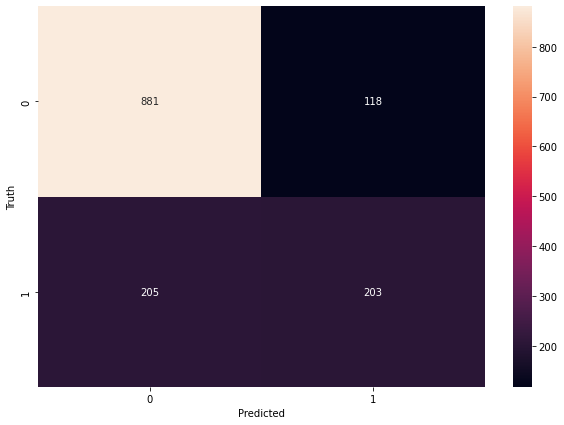

In [53]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
y_test.shape

(1407,)

## ACCURACY

In [57]:
round((881+203)/(881+203+118+205),2)

0.77

## Precision for Customers who did not Churn

In [58]:
round((881/(881+205)),2)

0.81

## Precision for Customers who Churned

In [59]:
round((203/(203+118)),2)

0.63

## Recall

In [60]:
round((881/(881+118)),2)

0.88

In [61]:
round((203/(203+205)),2)

0.5